In [43]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("SALES PROJECT(in).csv", sep=";")

# Rename and clean column names
df.columns = [
    "Date", "Title", "Category", "Supplier", "Sales Quantity",
    "Original Price", "Discount %", "Final Price", "Unit Cost",
    "Revenue", "Profit", "Lead Time (days)", "Stock Level"
]

# Step 1: Simplify product title
df["Title"] = "Fjallraven Backpack"

# Step 2: Format Date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Date"] = df["Date"].dt.date  # just keep the date, drop time

# Convert numeric columns
numeric_cols = [
    "Sales Quantity", "Original Price", "Discount %", "Final Price",
    "Unit Cost", "Revenue", "Profit", "Lead Time (days)", "Stock Level"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Step 3: Calculate missing Final Price
df.loc[
    df["Final Price"].isna() & df["Revenue"].notna() & df["Sales Quantity"].notna(),
    "Final Price"
] = df["Revenue"] / df["Sales Quantity"]

# Step 4: Set Original Price = Final Price where Discount % = 0
df.loc[
    df["Original Price"].isna() & df["Discount %"].eq(0) & df["Final Price"].notna(),
    "Original Price"
] = df["Final Price"]

# Step 5a: Recalculate Profit if missing
df.loc[
    df["Profit"].isna() & df["Revenue"].notna() & df["Unit Cost"].notna() & df["Sales Quantity"].notna(),
    "Profit"
] = df["Revenue"] - (df["Unit Cost"] * df["Sales Quantity"])

# Step 5b: Recalculate Unit Cost if missing
df.loc[
    df["Unit Cost"].isna() & df["Revenue"].notna() & df["Profit"].notna() & df["Sales Quantity"].notna(),
    "Unit Cost"
] = (df["Revenue"] - df["Profit"]) / df["Sales Quantity"]

# Step 6: Format prices and numerical values to 2 decimal places
df["Final Price"] = df["Final Price"].round(2)
df["Original Price"] = df["Original Price"].round(2)
df["Unit Cost"] = df["Unit Cost"].round(2)
df["Revenue"] = df["Revenue"].round(2)
df["Profit"] = df["Profit"].round(2)

# Step 7: Generate Summary
summary = {
    "Total Units Sold": df["Sales Quantity"].sum(),
    "Total Revenue": df["Revenue"].sum(),
    "Total Profit": df["Profit"].sum(),
    "Average Price per Unit": df["Final Price"].mean(),
    "Average Unit Cost": df["Unit Cost"].mean(),
    "Profit Margin (%)": (df["Profit"].sum() / df["Revenue"].sum()) * 100,
    "Min Stock Level": df["Stock Level"].min(),
    "Max Stock Level": df["Stock Level"].max()
}

# Display summary
print("\n📊 Summary Report")
for k, v in summary.items():
    if isinstance(v, float):
        print(f"{k}: {v:.2f}")
    else:
        print(f"{k}: {v}")

# Save cleaned version
df.to_csv("sales_cleaned_restart.csv", index=False)
("\n✅ Cleaned dataset saved as 'sales_cleaned_restart.csv'")



📊 Summary Report
Total Units Sold: 354294
Total Revenue: 60534970
Total Profit: 19368485
Average Price per Unit: inf
Average Unit Cost: inf
Profit Margin (%): 32.00
Min Stock Level: 10
Max Stock Level: 199


"\n✅ Cleaned dataset saved as 'sales_cleaned_restart.csv'"

In [44]:
import pandas as pd

# Load data
df = pd.read_csv("SALES PROJECT(in).csv", sep=";")

# Rename and clean column names
df.columns = [
    "Date", "Title", "Category", "Supplier", "Sales Quantity",
    "Original Price", "Discount %", "Final Price", "Unit Cost",
    "Revenue", "Profit", "Lead Time (days)", "Stock Level"
]

# Step 1: Simplify product title
df["Title"] = "Fjallraven Backpack"

# Step 2: Format Date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Date"] = df["Date"].dt.date  # Remove time part

# Step 3: Convert numeric columns
numeric_cols = [
    "Sales Quantity", "Original Price", "Discount %", "Final Price",
    "Unit Cost", "Revenue", "Profit", "Lead Time (days)", "Stock Level"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Step 4: Fill in Final Price
df.loc[
    df["Final Price"].isna() & df["Revenue"].notna() & df["Sales Quantity"].notna(),
    "Final Price"
] = df["Revenue"] / df["Sales Quantity"]

# Step 5: Fill in Original Price if no discount
df.loc[
    df["Original Price"].isna() & df["Discount %"].eq(0) & df["Final Price"].notna(),
    "Original Price"
] = df["Final Price"]

# Step 6: Fill in missing Profit
df.loc[
    df["Profit"].isna() & df["Revenue"].notna() & df["Unit Cost"].notna() & df["Sales Quantity"].notna(),
    "Profit"
] = df["Revenue"] - (df["Unit Cost"] * df["Sales Quantity"])

# Step 7: Fill in missing Unit Cost
df.loc[
    df["Unit Cost"].isna() & df["Revenue"].notna() & df["Profit"].notna() & df["Sales Quantity"].notna(),
    "Unit Cost"
] = (df["Revenue"] - df["Profit"]) / df["Sales Quantity"]

# Step 8: Round values
for col in ["Final Price", "Original Price", "Unit Cost", "Revenue", "Profit"]:
    df[col] = df[col].round(2)

# Step 9: Generate Summary Report
summary = {
    "📦 Total Units Sold": df["Sales Quantity"].sum(),
    "💰 Total Revenue": df["Revenue"].sum(),
    "🧾 Total Profit": df["Profit"].sum(),
    "💸 Avg Price per Unit": df["Final Price"].mean(),
    "🏷️ Avg Unit Cost": df["Unit Cost"].mean(),
    "📈 Profit Margin (%)": (df["Profit"].sum() / df["Revenue"].sum()) * 100,
    "📉 Min Stock Level": df["Stock Level"].min(),
    "📊 Max Stock Level": df["Stock Level"].max()
}

# Print summary nicely
print("\n🔍 SALES SUMMARY REPORT")
for k, v in summary.items():
    if isinstance(v, float):
        print(f"{k}: {v:,.2f}")
    else:
        print(f"{k}: {v}")

# Step 10: Save cleaned data
df.to_csv("sales_cleaned_restart.csv", index=False)
("\n✅ Cleaned data saved to 'sales_cleaned_restart.csv'")



🔍 SALES SUMMARY REPORT
📦 Total Units Sold: 354294
💰 Total Revenue: 60534970
🧾 Total Profit: 19368485
💸 Avg Price per Unit: inf
🏷️ Avg Unit Cost: inf
📈 Profit Margin (%): 32.00
📉 Min Stock Level: 10
📊 Max Stock Level: 199


"\n✅ Cleaned data saved to 'sales_cleaned_restart.csv'"

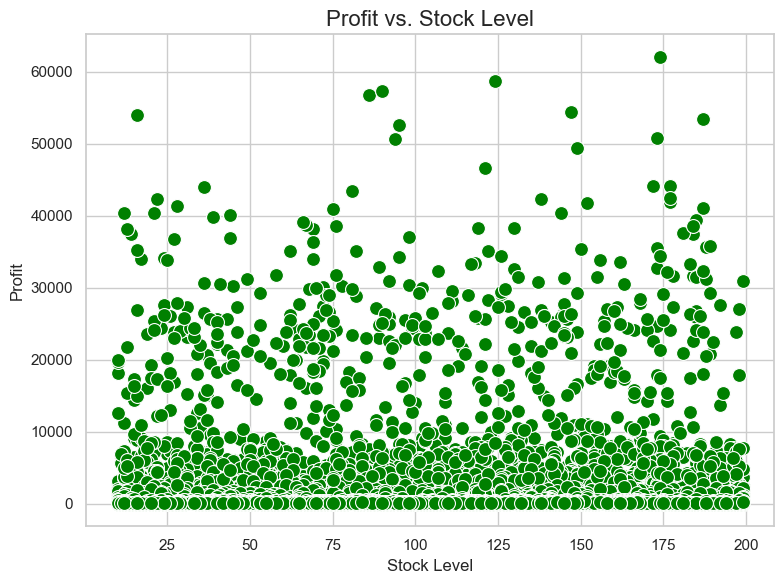

C:\Users\Sikha\AppData\Local\Temp\ipykernel_19292\1732311724.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Supplier", y="Revenue", estimator=sum, ci=None, palette="Blues_d")


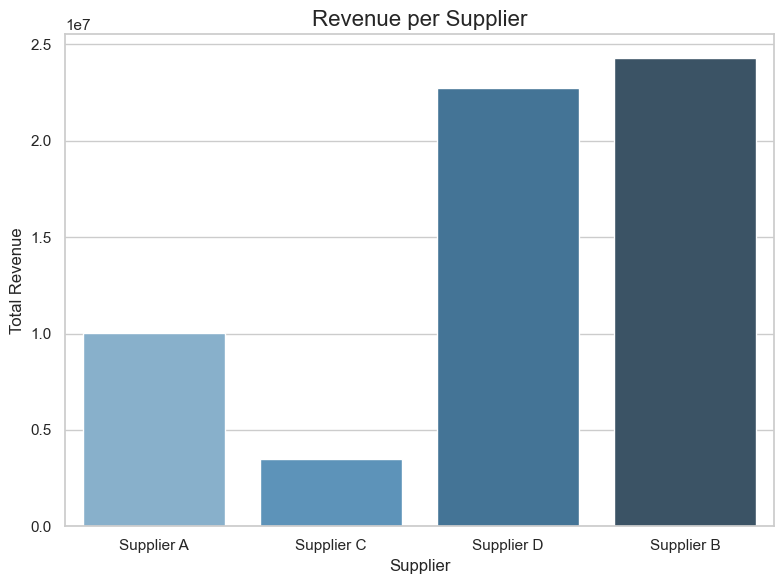

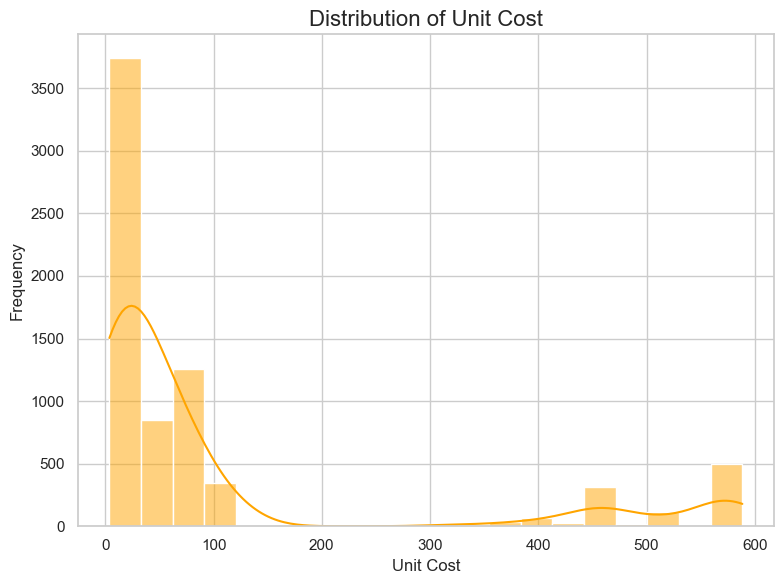

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv("sales_cleaned_restart.csv")

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Profit vs. Stock Level (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Stock Level", y="Profit", color='green', s=100)
plt.title("Profit vs. Stock Level", fontsize=16)
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.tight_layout()
plt.show()

# 2. Revenue per Supplier (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Supplier", y="Revenue", estimator=sum, ci=None, palette="Blues_d")
plt.title("Revenue per Supplier", fontsize=16)
plt.xlabel("Supplier", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Unit Cost Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df["Unit Cost"], kde=True, color="orange", bins=20)
plt.title("Distribution of Unit Cost", fontsize=16)
plt.xlabel("Unit Cost", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


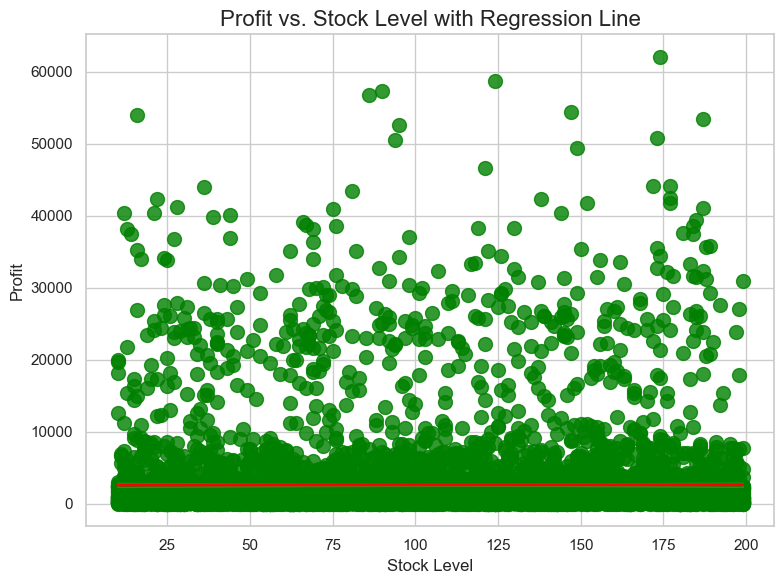

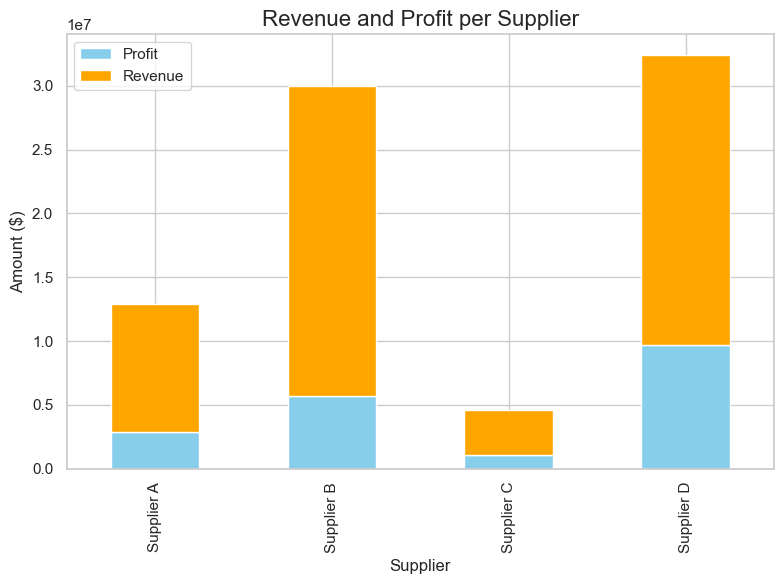

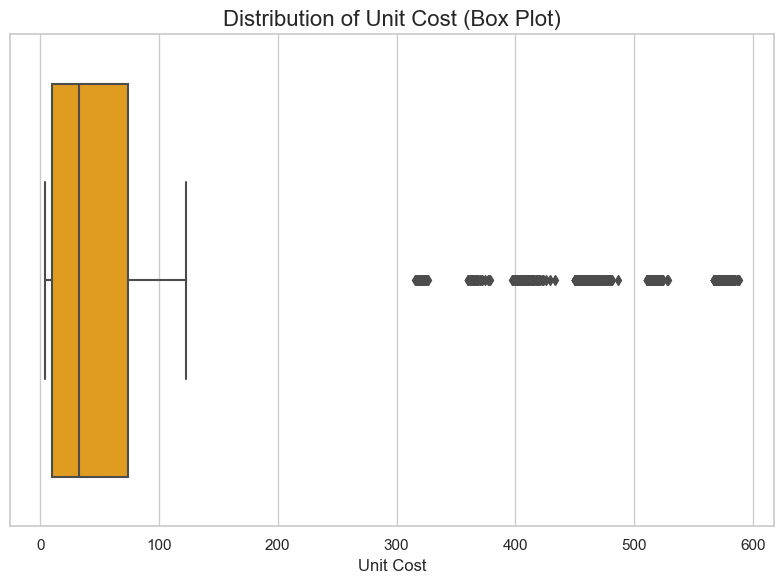

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
df = pd.read_csv("sales_cleaned_restart.csv")

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Profit vs. Stock Level with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="Stock Level", y="Profit", scatter_kws={"color": "green", "s": 100}, line_kws={"color": "red", "lw": 2})
plt.title("Profit vs. Stock Level with Regression Line", fontsize=16)
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.tight_layout()
plt.show()

# 2. Revenue and Profit per Supplier (Stacked Bar Plot)
# Create a pivot table to show Revenue and Profit per Supplier
df_pivot = df.pivot_table(index="Supplier", values=["Revenue", "Profit"], aggfunc="sum")

# Plot Stacked Bar Plot
df_pivot.plot(kind="bar", stacked=True, figsize=(8, 6), color=["skyblue", "orange"])
plt.title("Revenue and Profit per Supplier", fontsize=16)
plt.xlabel("Supplier", fontsize=12)
plt.ylabel("Amount ($)", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Unit Cost Distribution (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Unit Cost", color="orange")
plt.title("Distribution of Unit Cost (Box Plot)", fontsize=16)
plt.xlabel("Unit Cost", fontsize=12)
plt.tight_layout()
plt.show()


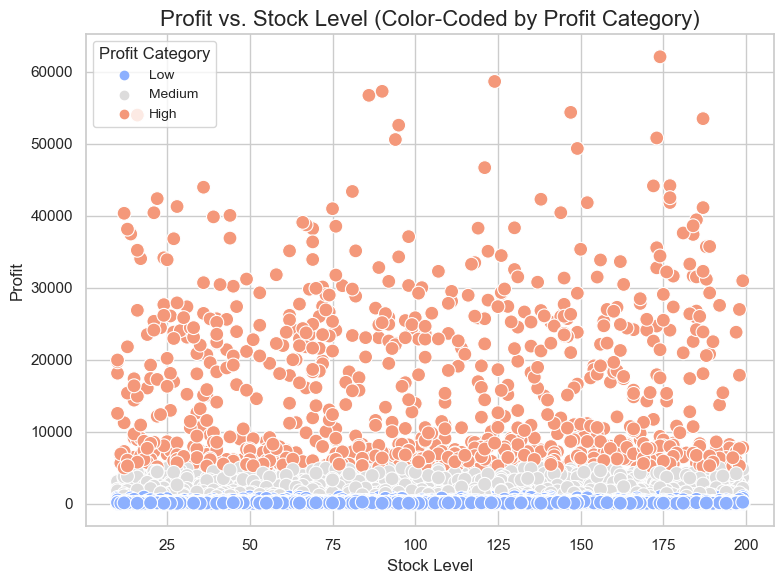

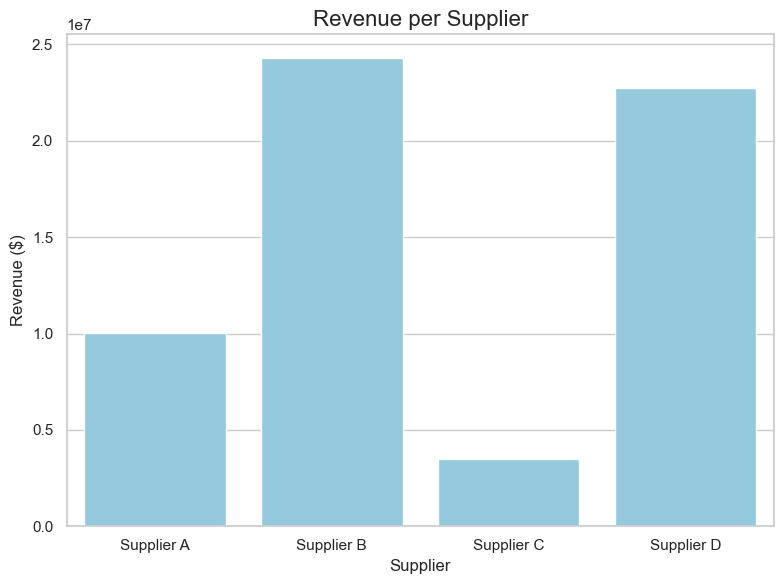

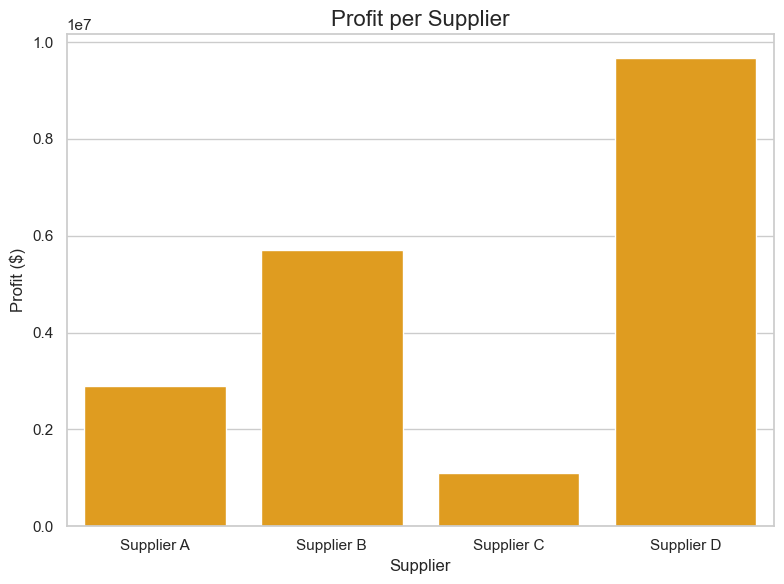

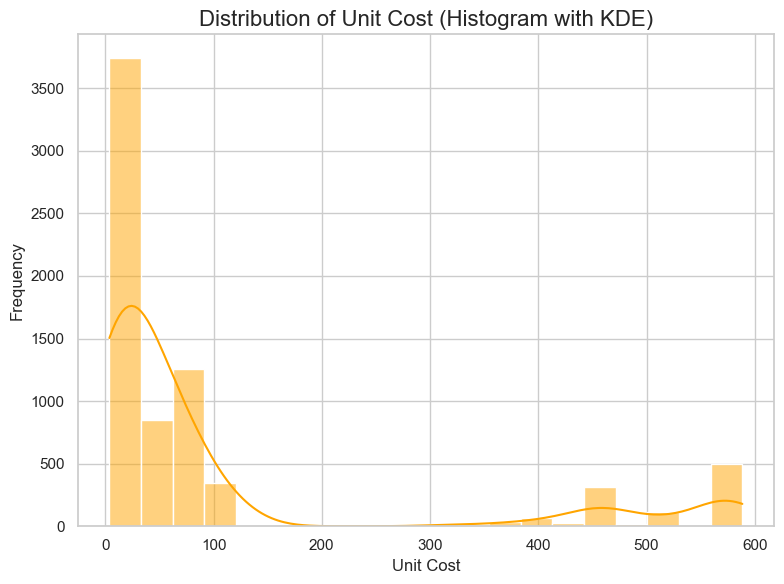

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
df = pd.read_csv("sales_cleaned_restart.csv")

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Profit vs. Stock Level with Color-Coded Points (Profit Category)
# Create a new column to categorize profit
df['Profit Category'] = pd.cut(df['Profit'], bins=[-np.inf, 1000, 5000, np.inf], labels=['Low', 'Medium', 'High'])

# Scatter plot with color-coded points based on profit category
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Stock Level", y="Profit", hue="Profit Category", palette="coolwarm", s=100)
plt.title("Profit vs. Stock Level (Color-Coded by Profit Category)", fontsize=16)
plt.xlabel("Stock Level", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.legend(title="Profit Category", fontsize=10)
plt.tight_layout()
plt.show()

# 2. Revenue and Profit per Supplier (Multiple Bar Plots)
# Create a pivot table to show Revenue and Profit per Supplier
df_pivot = df.pivot_table(index="Supplier", values=["Revenue", "Profit"], aggfunc="sum")

# Plot Revenue
plt.figure(figsize=(8, 6))
sns.barplot(data=df_pivot, x=df_pivot.index, y="Revenue", color="skyblue")
plt.title("Revenue per Supplier", fontsize=16)
plt.xlabel("Supplier", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.tight_layout()
plt.show()

# Plot Profit
plt.figure(figsize=(8, 6))
sns.barplot(data=df_pivot, x=df_pivot.index, y="Profit", color="orange")
plt.title("Profit per Supplier", fontsize=16)
plt.xlabel("Supplier", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Unit Cost Distribution (Histogram with KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df["Unit Cost"], kde=True, color="orange", bins=20)
plt.title("Distribution of Unit Cost (Histogram with KDE)", fontsize=16)
plt.xlabel("Unit Cost", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


### Sales Quantity vs. Profit (Scatter Plot)

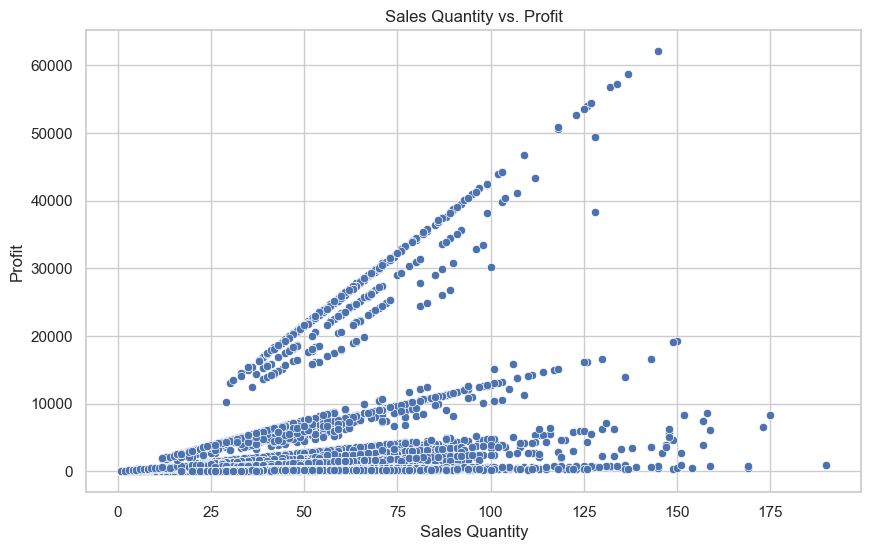

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a dataframe called 'df'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales Quantity', y='Profit')
plt.title('Sales Quantity vs. Profit')
plt.xlabel('Sales Quantity')
plt.ylabel('Profit')
plt.show()


### Profit vs. Stock Level (Bubble Chart)

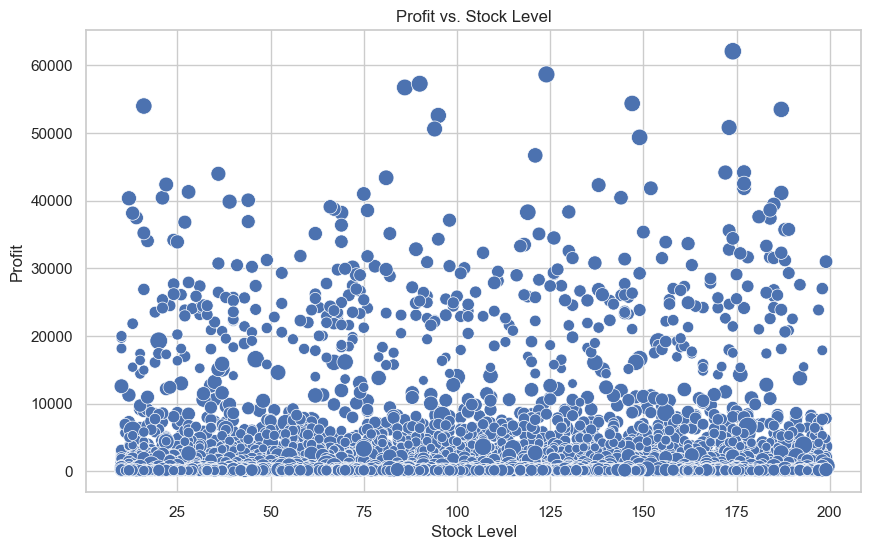

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Stock Level', y='Profit', size='Sales Quantity', sizes=(20, 200), legend=None)
plt.title('Profit vs. Stock Level')
plt.xlabel('Stock Level')
plt.ylabel('Profit')
plt.show()


## Final Price vs. Profit Category (Box Plot)

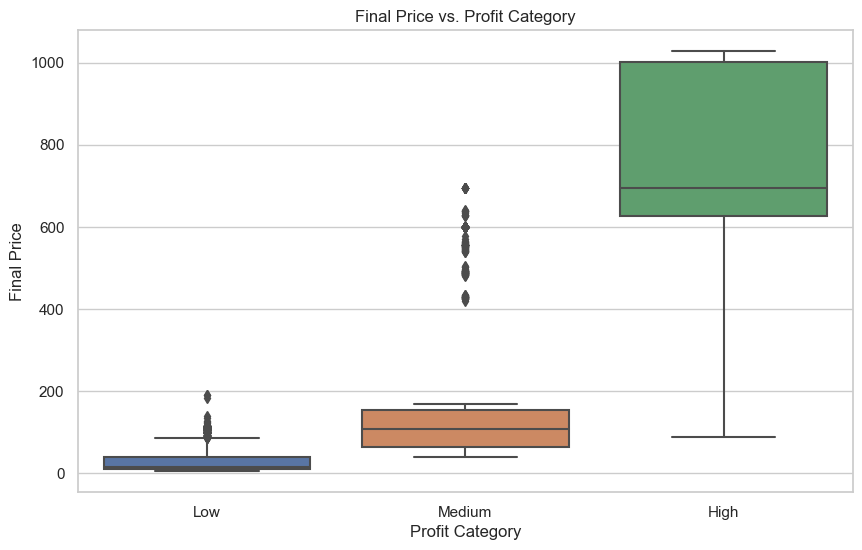

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profit Category', y='Final Price')
plt.title('Final Price vs. Profit Category')
plt.xlabel('Profit Category')
plt.ylabel('Final Price')
plt.show()


###  Lead Time vs. Sales Quantity (Line Chart)

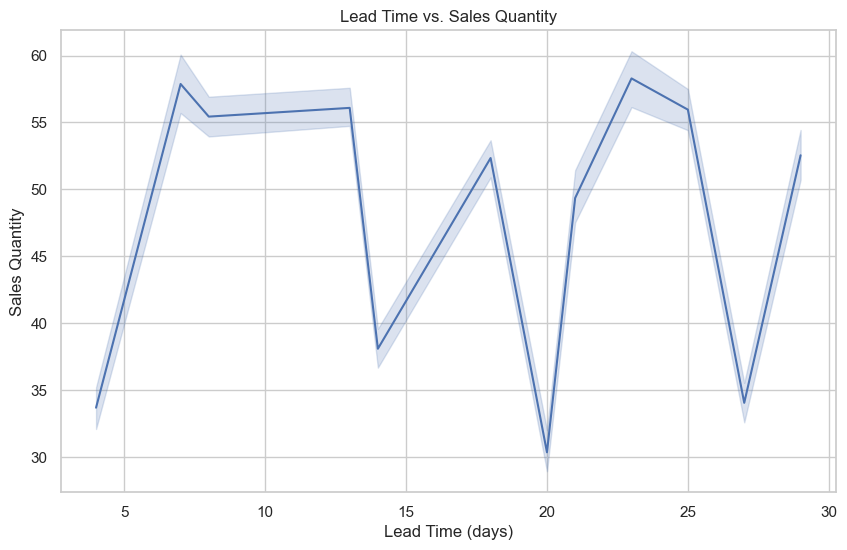

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Lead Time (days)', y='Sales Quantity')
plt.title('Lead Time vs. Sales Quantity')
plt.xlabel('Lead Time (days)')
plt.ylabel('Sales Quantity')
plt.show()


In [ ]:
 Discount % vs. Final Price (Scatter Plot)

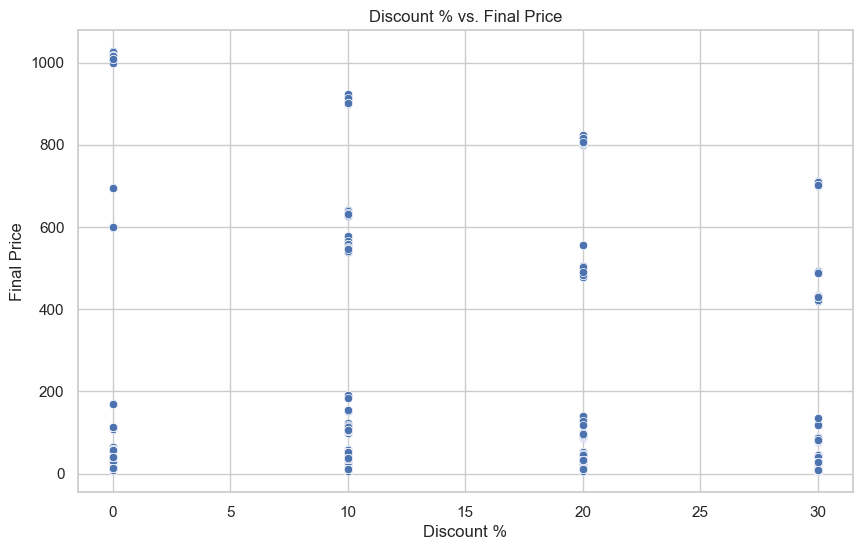

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount %', y='Final Price')
plt.title('Discount % vs. Final Price')
plt.xlabel('Discount %')
plt.ylabel('Final Price')
plt.show()


In [ ]:
Profit vs. Supplier (Bar Chart)

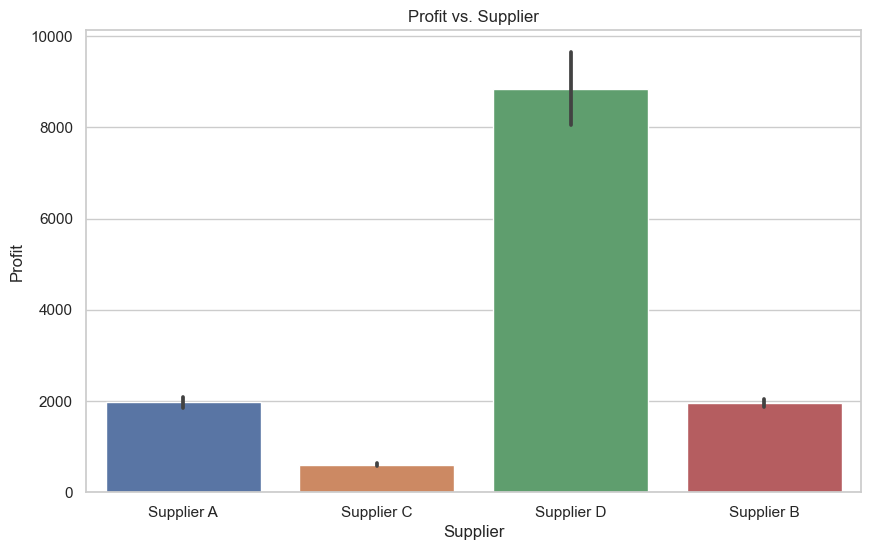

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Supplier', y='Profit')
plt.title('Profit vs. Supplier')
plt.xlabel('Supplier')
plt.ylabel('Profit')
plt.show()


In [ ]:
Sales Quantity vs. Unit Cost (Scatter Plot)

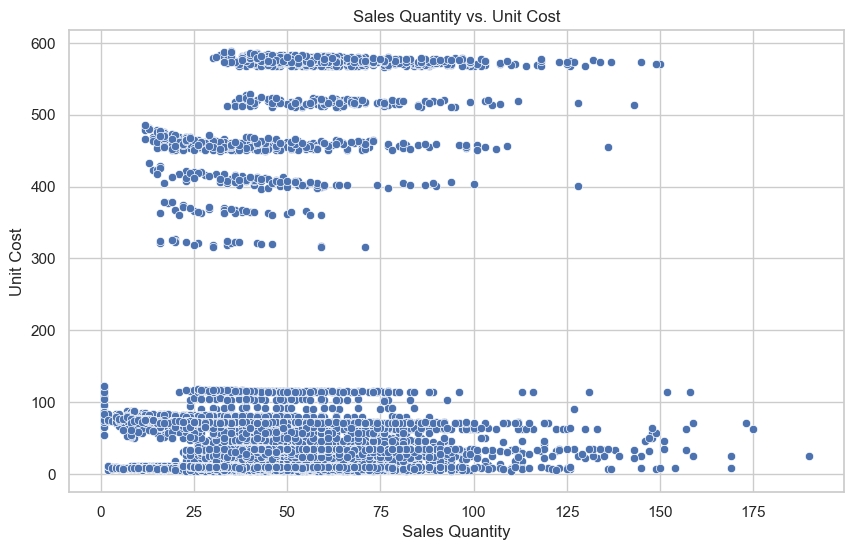

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales Quantity', y='Unit Cost')
plt.title('Sales Quantity vs. Unit Cost')
plt.xlabel('Sales Quantity')
plt.ylabel('Unit Cost')
plt.show()


In [ ]:
 Revenue vs. Profit (Column Chart)

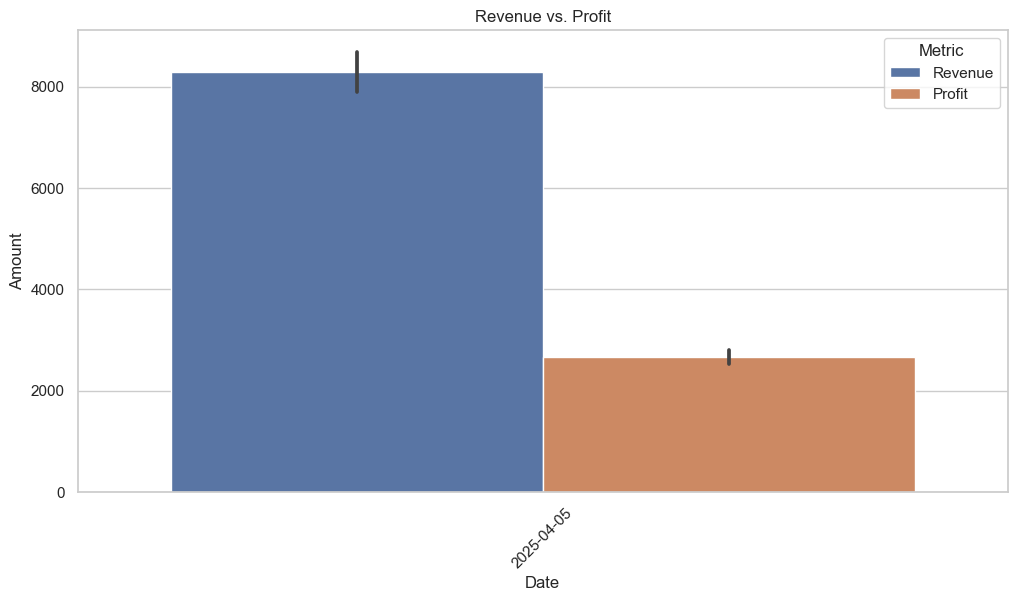

In [39]:
df_melted = df.melt(id_vars=['Date'], value_vars=['Revenue', 'Profit'], var_name='Metric', value_name='Amount')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Date', y='Amount', hue='Metric')
plt.title('Revenue vs. Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


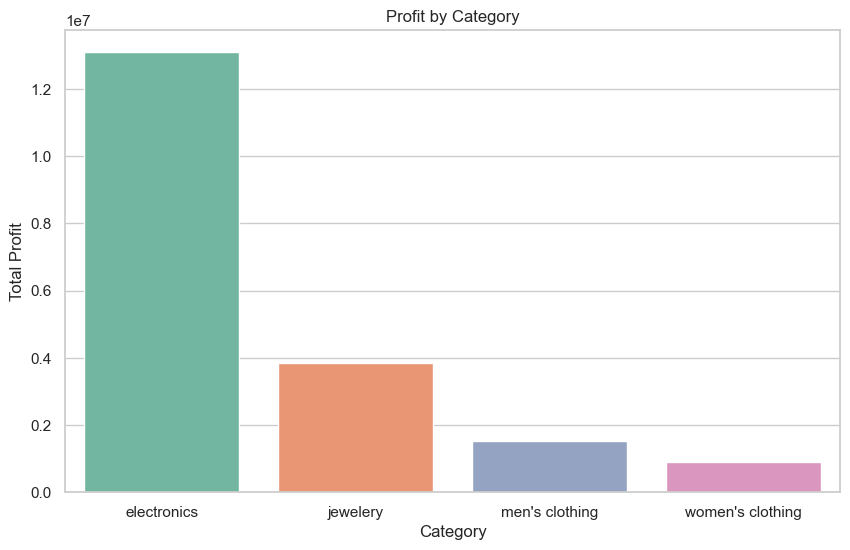

In [40]:
category_profit = df.groupby('Category')[['Profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_profit, x='Category', y='Profit', palette='Set2')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()


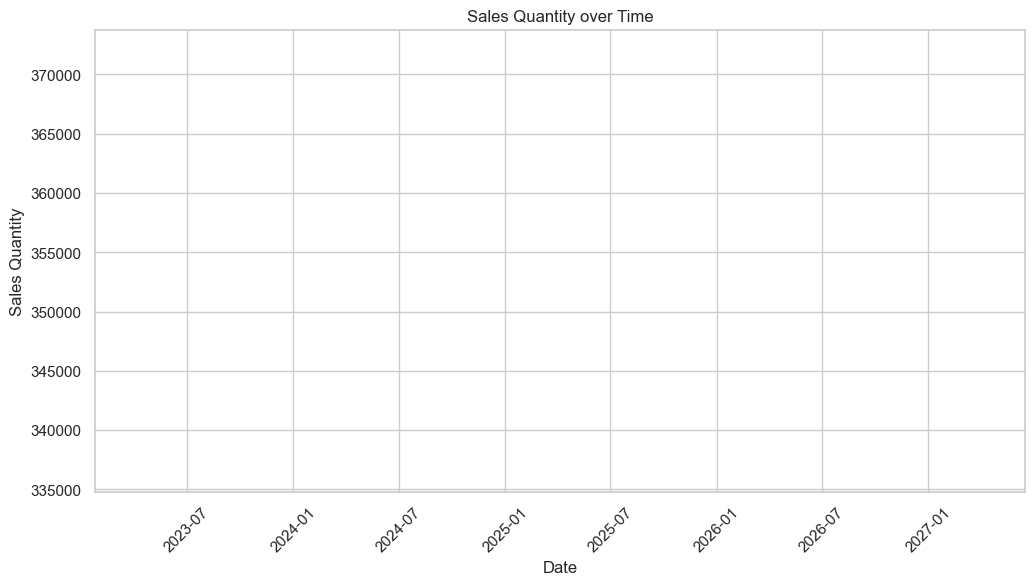

In [41]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df_grouped = df.groupby('Date').agg({'Sales Quantity': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Date', y='Sales Quantity')
plt.title('Sales Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.show()


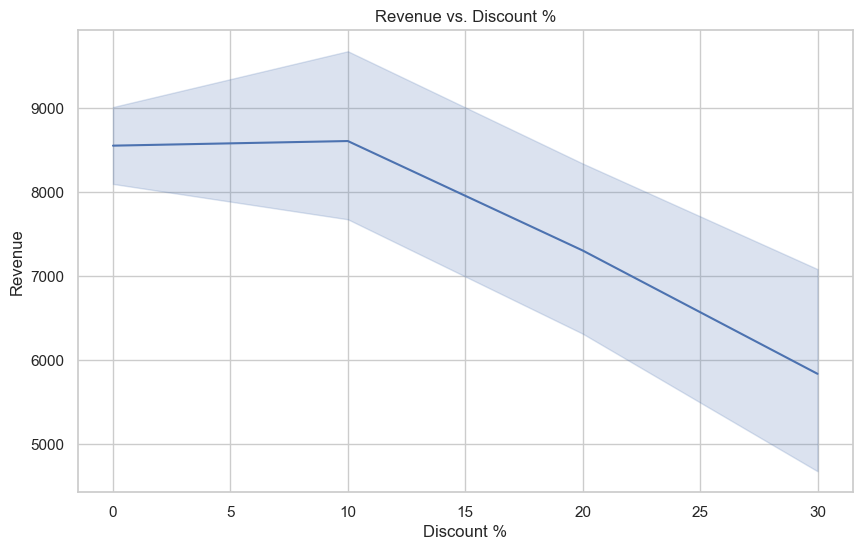

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Discount %', y='Revenue')
plt.title('Revenue vs. Discount %')
plt.xlabel('Discount %')
plt.ylabel('Revenue')
plt.show()
